from https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a/ Fourier Transform, the Practical Python Implementation A practical application on real-world signals
Omar Alkousa Feb 27, 2023 12 min read Share Fourier Transform is one of the most famous tools in signal processing and analysis of time series. The Fast Fourier Transform (FFT) is the practical implementation of the Fourier Transform on Digital Signals. FFT is considered one of the top 10 algorithms with the greatest impact on science and engineering in the 20th century [1]. In this post, a practical approach to FFT has been discussed as how to use it to represent the frequency domain (spectrum) of the signal data and plot the spectrum using Plotly to give us more interactivity and a better understanding of the features in the spectrum. By the end of this post, we’ll build a class to analyze the signal. An ECG signal and its spectrum have been provided as a final example. Introduction Fourier Transform (FT) relates the time domain of a signal to its frequency domain, where the frequency domain contains the information about the sinusoids (amplitude, frequency, phase) that construct the signal. Since FT is a continuous transform, the Discrete Fourier Transform (DFT) becomes the applicable transform in the digital world that holds the information of signals in the discrete format as a set of samples, where the sampling theorem is the strict rule of discretizing and the signal. The DFT of a signal (xn) with N number of samples is given by the following equation [2]:
The output of the DFT (Xk) is an array of complex numbers that hold the information of frequency components [2]. Applying DFT on signals using the mathematical equation directly demands a heavy computation complexity. Luckily, a Fast Fourier Transform (FFT) was developed 3(https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/) to provide a faster implementation of the DFT. The FFT takes advantage of the symmetry nature of the output of the DFT. We will not further discuss how FFT works as it’s like the standard practical application of DFT. But if you want more details, refer to [3].
Let’s Code: We will start simply to understand the inputs and outputs of each method we use in this post. First, we will import the required packages. Numpy is for dealing with matrices and calculations. We import the methods that help us with the calculations related to Fourier Analysis from scipy.fft module (fft, rfft, fftfreq, rfftfreq). Finally, Plotly and matplotlib are for visualization.
Let’s get started…

In [3]:
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import Signal_Generator_class
%matplotlib inline
plt.show()

We need signals to try our code on. Sinusoids are great and fit to our examples. In the next code, we generate a sinusoidal Signal using a class named Signal, which you can find ready to use following this GitHub gist. The signal we will generate using the previous class contains three sinusoids (1, 10, 20) Hz with amplitudes of (3, 1, 0.5), respectively. The sampling rate will be 200 and the duration of the signal is 2 seconds.

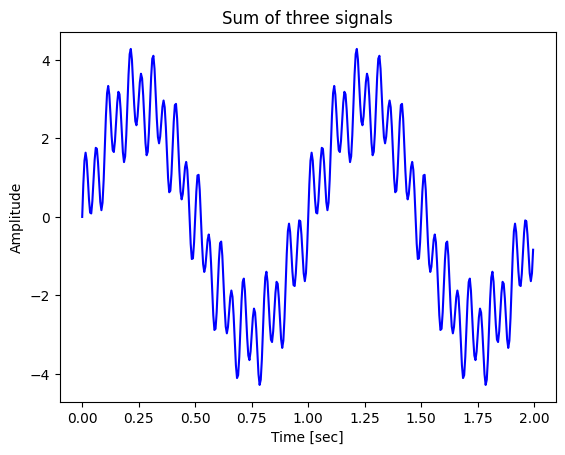

In [4]:
import Signal_Generator_class as sg
# Generate the three signals using Signal class and its method sine()
signal_1hz = sg.Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = sg.Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = sg.Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

The Fourier Transform of this signal can be calculated using (fft) from the scipy package as follows [4]:

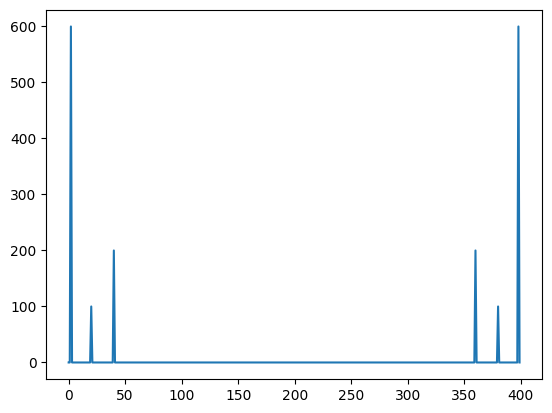

In [5]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()

The figure above should represent the frequency spectrum of the signal. Notice that the x-axis is the number of samples (instead of the frequency components) and the y-axis should represent the amplitudes of the sinusoids. To get the actual amplitudes of the spectrum, we have to normalize the output of (fft) by N/2 the number of samples.

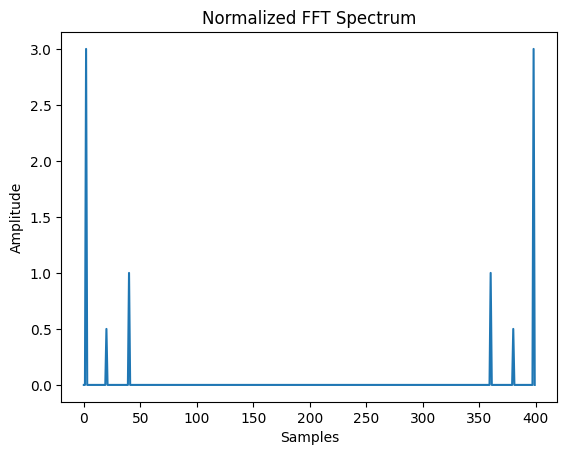

In [6]:
# Calculate N/2 to normalize the FFT output
N = len(signal)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()

To get the frequency components (x-axis), you can use (fftfreq) from the scipy package. This method needs the number of samples (N) and the sampling rate as input arguments. And it returns a frequency axis with N frequency components [5].

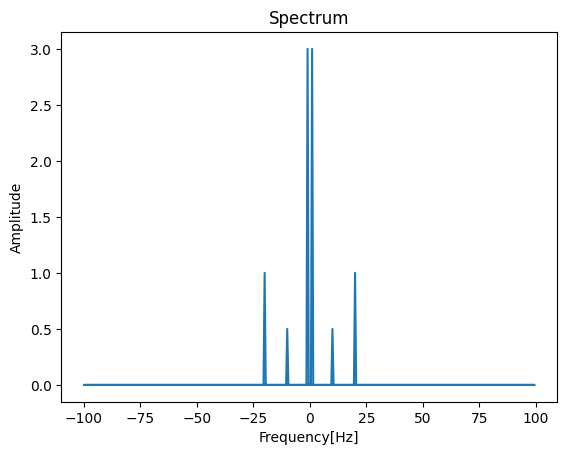

In [7]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

To understand what happened in the last code, let’s plot only the frequency axis:

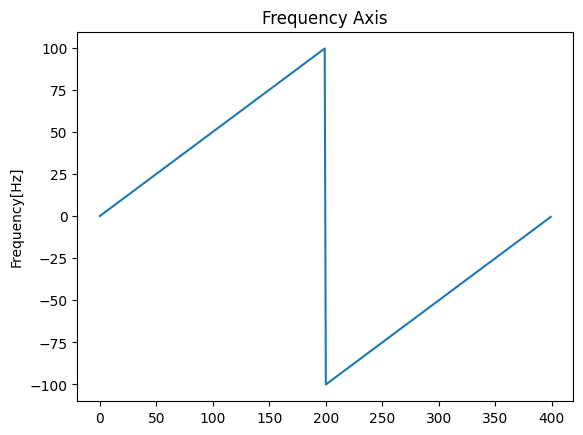

In [8]:
# Plot the frequency axis for more explanation
plt.plot(frequency_axis)
plt.ylabel('Frequency[Hz]')
plt.title('Frequency Axis')
plt.show()

Notice that the frequency array starts at zero. Then, it begins to increase with (d) step by step to reach its maximum (100Hz). After that, it starts from the negative maximum frequency (-100Hz) to increase back again with (d) step by step. The maximum frequency that can hold information from the signal (100Hz) is half of the sampling rate and this is true according to the Sampling Theorem [2].

Due to the symmetry of the spectrum for the real-value signals, we only focus on the first half of the spectrum [2]. The Scipy package provides methods to deal with the Fourier transform of the real-value signals, where it takes advantage symmetry nature of the spectrum. Such methods are (rfft [6], rfftfreq [7]). These methods are the same as (fft, fftfreq), respectively. By comparing the time execution between (fft) and (rfft) methods on the same signal, you’ll find that (rfft) is a little bit faster. When dealing with real-value signals, which is most likely the case, using (rfft) is the best choice.

In [9]:
# Calculate the time execution of (fft)
print('Execution time of fft function:')
%timeit fft(signal)
# Calculate the time execution of (rfft)
print('nExecution time of rfft function:')
%timeit rfft(signal)

Execution time of fft function:
3.97 μs ± 5.25 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nExecution time of rfft function:
3.62 μs ± 40.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


To conclude our discussion about scaling the amplitudes and generating the frequency axis of the spectrum for real-values signal data that have a symmetry nature in their frequency domain, the code below represents the final form of the spectrum (the actual amplitudes on the right frequencies).

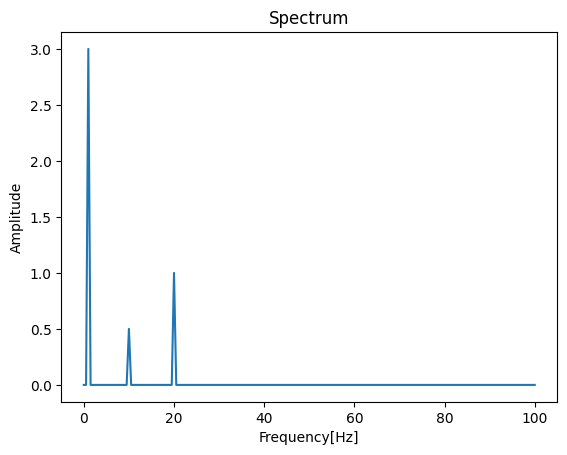

In [10]:
# Plot the actual spectrum of the signal
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(signal))/N)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

The figure below helps you understand and memorize how to get each of the frequency axis and the actual amplitudes of the sinusoids that construct the spectrum.

The Final Code
Now that we’ve understood the inputs and outputs of each method we used in Fourier analysis, let’s do our final code. We will build a class (Fourier) to make our use of Fourier Transform more convenient and easier to use. The class we need should calculate the DFT of the signal data and intuitively visualize the data. Make sure to read the documentation of the class to understand the use of this class. If you are not familiar with classes in Python and how to build one, refer to this previous post about building a class to generate signals.

Let’s try our class on the signal above. The input arguments are the real-values signal data (Time Domain) and the sampling rate of this signal.

In [14]:
import Fourier as ft
import numpy as np
# Apply the DFT using the class Fourier
fourier = ft.Fourier(signal, sampling_rate=200)
# Plot the spectrum interactively using the class Fourier
fourier.plot_spectrum(interactive=True)

NameError: name 'rfftfreq' is not defined